# Assignments for "Performance Measurement Metrics"

In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Evaluate the performance of your model with the metrics you have learned in this course.
- Plot the ROC and the precision / recall curves for different "c" values.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("new-data.csv", sep=",")
df

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,0,3,1,22.00,1,0,7.2500,0,0,1
1,1,1,1,0,38.00,1,0,71.2833,1,0,0
2,2,1,3,0,26.00,0,0,7.9250,0,0,1
3,3,1,1,0,35.00,1,0,53.1000,0,0,1
4,4,0,3,1,35.00,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,1,27.00,0,0,13.0000,0,0,1
887,887,1,1,0,19.00,0,0,30.0000,0,0,1
888,888,0,3,0,27.25,1,2,23.4500,0,0,1
889,889,1,1,1,26.00,0,0,30.0000,1,0,0


In [3]:
df.drop(["Unnamed: 0",], axis =1, inplace = True)

In [4]:
from sklearn.preprocessing import StandardScaler
list = ["Age","Fare"]
for i in list:
    df[i] = StandardScaler().fit_transform(df[[i]])
df    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,-0.571726,1,0,-0.502445,0,0,1
1,1,1,0,0.625395,1,0,0.786845,1,0,0
2,1,3,0,-0.272446,0,0,-0.488854,0,0,1
3,1,1,0,0.400935,1,0,0.420730,0,0,1
4,0,3,1,0.400935,0,0,-0.486337,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.197626,0,0,-0.386671,0,0,1
887,1,1,0,-0.796186,0,0,-0.044381,0,0,1
888,0,3,0,-0.178921,1,2,-0.176263,0,0,1
889,1,1,1,-0.272446,0,0,-0.044381,1,0,0


In [5]:
y=df["Survived"]
X=df[["Sex", "Pclass", "Age","SibSp","Parch","Fare","C","Q","S"]]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
prediction_model = LogisticRegression()
prediction_model.fit(X_train, y_train)

train_prediction = prediction_model.predict(X_train)
test_prediction = prediction_model.predict(X_test)

test_prediction_probability = prediction_model.predict_proba(X_test)[:,1]

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train, train_prediction)
confusion_matrix_test = confusion_matrix(y_test, test_prediction)

In [10]:
print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[372  64]
 [ 77 199]]


Confusion Matrix (Test Data)
------------------------------
[[94 19]
 [20 46]]


In [11]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 94
True positive amount  : 46
False positive amount : 19
False negative amount : 20


In [12]:
from sklearn.metrics import accuracy_score

print("Accuracy value by the model   : ",  prediction_model.score(X_test, y_test))
print("Calculated accuracy value     : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() value        : ",  accuracy_score(y_test, test_prediction))

Accuracy value by the model   :  0.7821229050279329
Calculated accuracy value     :  0.7821229050279329
accuracy_score() value        :  0.7821229050279329


In [13]:
from sklearn.metrics import precision_score

print("Calculated precision value   : ",  (TP)/(FP + TP))
print("precision_score() value      : ",  precision_score(y_test, test_prediction))

Calculated precision value   :  0.7076923076923077
precision_score() value      :  0.7076923076923077


In [14]:
from sklearn.metrics import recall_score

print("Calculated recall value   : ",  (TP)/(TP + FN))
print("recall_score() value      : ",  recall_score(y_test, test_prediction))

Calculated recall value   :  0.696969696969697
recall_score() value      :  0.696969696969697


In [15]:
print("Calculated specificity value   : ",  (TN)/(TN + FP))

Calculated specificity value   :  0.831858407079646


In [16]:
from sklearn.metrics import f1_score

precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)


print("Calculated F1 score  : ",  2*((recall*precision)/(recall + precision)))
print("f1_score() value     : ",  f1_score(y_test, test_prediction))

Calculated F1 score  :  0.702290076335878
f1_score() value     :  0.702290076335878


In [17]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test, test_prediction))

print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       113
           1       0.71      0.70      0.70        66

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

f1_score() value        : 0.70
recall_score() value    : 0.70
precision_score() value : 0.71


Precision  : [0.8245614  0.70769231]
Recall     : [0.83185841 0.6969697 ]
F1 Score   : [0.82819383 0.70229008]


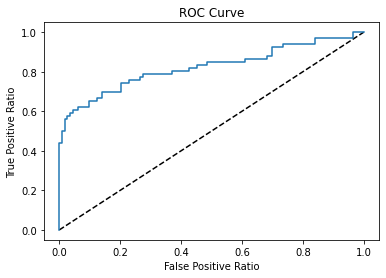

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_probability)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

In [21]:
print('AUC value : ', roc_auc_score(y_test,test_prediction_probability))

AUC value :  0.8223384285331188


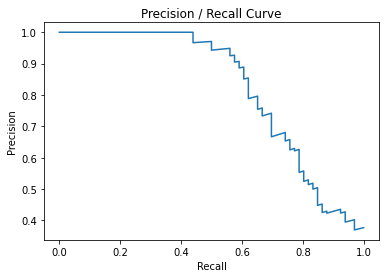

In [22]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, test_prediction_probability)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')

plt.show()

In [24]:
from sklearn.metrics import log_loss

print("Logarithmic Loss (log-loss) : " , log_loss(y_test, test_prediction_probability))
print("Error Rate                  : " , 1- accuracy_score(y_test, test_prediction))

Logarithmic Loss (log-loss) :  0.46609165796717333
Error Rate                  :  0.2178770949720671


In [25]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, y_train),
                                              'Test Accuracy': lr.score(X_test, y_test)
                                             }, ignore_index=True)
display(accuracy_values) 

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.647472,0.664804
1,0.010,0.776685,0.826816
2,0.100,0.808989,0.793296
3,1.000,0.803371,0.787709
4,10.000,0.800562,0.787709
5,100.000,0.800562,0.787709
6,1000.000,0.800562,0.787709
